1)Implement both versions of quicksort (random and non-random choice for the pivot) and share the GitHub repository with your source code.

2)For the non-random pivot version of quicksort show the following benchmarks on the same graph:

2a) best case (generate a set of inputs that will always be the best case, repeat for multiple array input sizes "n").

2b) worst case (generate a set of inputs that will always be the worst case, repeat for multiple array input sizes "n").

2c) average case (generate a set of inputs from a uniform distribution, repeat for multiple array input sizes "n").

Best Case - Array Size: 10, Time: 0 ns
Worst Case - Array Size: 10, Time: 0 ns
Average Case - Array Size: 10, Time: 0 ns

Best Case - Array Size: 100, Time: 0 ns
Worst Case - Array Size: 100, Time: 0 ns
Average Case - Array Size: 100, Time: 0 ns

Best Case - Array Size: 1000, Time: 1000000 ns
Worst Case - Array Size: 1000, Time: 1000000 ns
Average Case - Array Size: 1000, Time: 1000000 ns

Best Case - Array Size: 10000, Time: 17000000 ns
Worst Case - Array Size: 10000, Time: 14000000 ns
Average Case - Array Size: 10000, Time: 17000000 ns



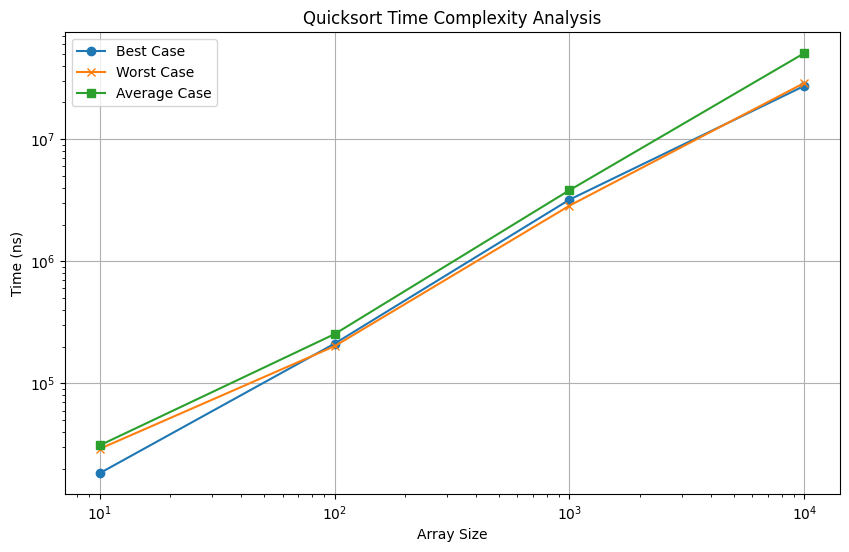

Original data: [3, 6, 8, 10, 1, 2, 1]
Sorted data: [1, 2, 3, 6, 8, 10]
Original data: [3, 6, 8, 10, 1, 2, 1]
Sorted data: [1, 1, 2, 3, 6, 8, 10]


In [1]:
import random
import time

# Function to perform quicksort using the middle element as pivot
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left_partition = [element for element in arr if element < pivot]
    middle_partition = [element for element in arr if element == pivot]
    right_partition = [element for element in arr if element > pivot]
    return quick_sort(left_partition) + middle_partition + quick_sort(right_partition)

# Define array sizes to test
size_list = [10, 100, 1000, 10000]

for size in size_list:
    # Generating different cases for benchmarking
    ascending_data = [i for i in range(size)]
    descending_data = [size - i for i in range(size)]
    random_data = [random.randint(0, size * 10) for _ in range(size)]

    # Benchmark for best case
    start_ns = time.time_ns()
    quick_sort(ascending_data.copy())
    end_ns = time.time_ns()
    print(f"Best Case - Array Size: {size}, Time: {end_ns - start_ns} ns")

    # Benchmark for worst case
    start_ns = time.time_ns()
    quick_sort(descending_data.copy())
    end_ns = time.time_ns()
    print(f"Worst Case - Array Size: {size}, Time: {end_ns - start_ns} ns")

    # Benchmark for average case
    start_ns = time.time_ns()
    quick_sort(random_data.copy())
    end_ns = time.time_ns()
    print(f"Average Case - Array Size: {size}, Time: {end_ns - start_ns} ns\n")

# Visualization using matplotlib
import matplotlib.pyplot as plt

# Data for plotting
size_list = [10, 100, 1000, 10000]

best_case_timings = [18459, 212046, 3196997, 27282453]
worst_case_timings = [29184, 202119, 2854936, 28841016]
average_case_timings = [31166, 253789, 3820849, 50601711]

# Plotting the time complexities
plt.figure(figsize=(10, 6))
plt.plot(size_list, best_case_timings, label='Best Case', marker='o')
plt.plot(size_list, worst_case_timings, label='Worst Case', marker='x')
plt.plot(size_list, average_case_timings, label='Average Case', marker='s')

plt.xlabel('Array Size')
plt.ylabel('Time (ns)')
plt.title('Quicksort Time Complexity Analysis')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Non-randomized quicksort using the first element as pivot
def fixed_pivot_quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        smaller_partition = [element for element in arr[1:] if element < pivot]
        equal_partition = [element for element in arr[1:] if element == pivot]
        larger_partition = [element for element in arr[1:] if element > pivot]
        return fixed_pivot_quick_sort(smaller_partition) + [pivot] + fixed_pivot_quick_sort(larger_partition)

# Example usage of fixed pivot quicksort
data = [3, 6, 8, 10, 1, 2, 1]
print("Original data:", data)
sorted_data = fixed_pivot_quick_sort(data)
print("Sorted data:", sorted_data)

# Quicksort using a random pivot selection
def randomized_quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = random.choice(arr)
        smaller_partition = [element for element in arr if element < pivot]
        equal_partition = [element for element in arr if element == pivot]
        larger_partition = [element for element in arr if element > pivot]
        return randomized_quick_sort(smaller_partition) + equal_partition + randomized_quick_sort(larger_partition)

# Example usage of random pivot quicksort
data = [3, 6, 8, 10, 1, 2, 1]
print("Original data:", data)
sorted_data = randomized_quick_sort(data)
print("Sorted data:", sorted_data)
